## Project Name: customer_churn_large_dataset

### Project Type:Supervised Machine Learning Model using Classification

## Step 1:Problem Statement

#### Main Goal of Our Project:

## Step 2:Data Gathering 

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# for checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PolynomialFeatures

# for model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

# for performance metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import roc_auc_score, log_loss, precision_score, f1_score, recall_score, auc, roc_curve



# data storing libraries
import json
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Step 3:Exploratory Data Analysis

In [3]:
#All details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [4]:
#summarizing statistical data of dataset
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
print("Row count -->",df.shape[0])
print("coulmn count -->",df.shape[1])

Row count --> 100000
coulmn count --> 9


##### Analysis Of Target column

In [6]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

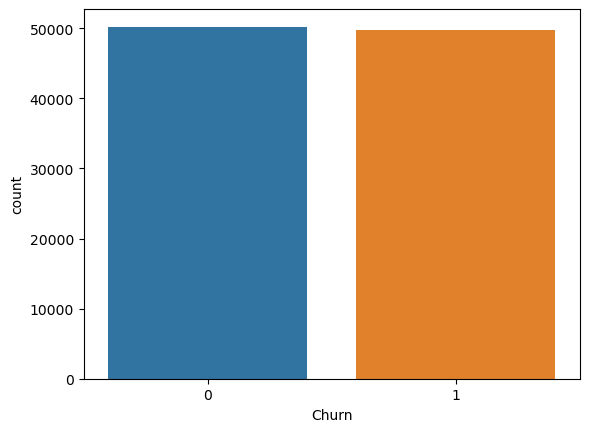

In [7]:
#visualization of target column
sns.countplot(df['Churn'])

##### checking Missing values in our data

In [8]:
#null values-NAN
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

##### Checking Duplicate Rows in our dataset

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Analysing each feature

## 1. CustomerID

In [11]:
df['CustomerID'].unique()

array([     1,      2,      3, ...,  99998,  99999, 100000], dtype=int64)

In [12]:
df['CustomerID'].value_counts()

1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: CustomerID, Length: 100000, dtype: int64

In [13]:
# Feature "CustomerID" contains all unique ordinal values, So these values are no useful to build model. 
# Hence we are droping it in Feature Engineering

## 2. Name

In [14]:
df['Name'].unique()

array(['Customer_1', 'Customer_2', 'Customer_3', ..., 'Customer_99998',
       'Customer_99999', 'Customer_100000'], dtype=object)

In [15]:
df['Name'].value_counts()

Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64

In [16]:
# Feature "Name" contains all unique ordinal values, So these values are no useful to build model. 
# Hence we are droping it in Feature Engineering

## 3. Age

In [17]:
df['Age'].unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23], dtype=int64)

In [18]:
df['Age'].value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

## 4. Gender

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
dict(df['Gender'].value_counts())

{'Female': 50216, 'Male': 49784}

In [21]:
# Here Catagorical data is ordinal and efficiently converting 
# into numerical at this stage by label encoding
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

## 5. Location

In [22]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [23]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [24]:
# Here Catagorical data is nominal and efficiently converting 
# into numerical by One-Hot encoding
df=pd.get_dummies(df,columns=['Location'])
df.head(5)

,CustomerID,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,1,17,73.36,236,0,0,0,1,0,0
1,2,Customer_2,62,0,1,48.76,172,0,0,0,0,0,1
2,3,Customer_3,24,0,5,85.47,460,0,0,0,1,0,0
3,4,Customer_4,36,0,3,97.94,297,1,0,0,0,1,0
4,5,Customer_5,46,0,19,58.14,266,0,0,0,0,1,0


## 6. Subscription_Length_Months

In [25]:
df['Subscription_Length_Months'].unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21], dtype=int64)

In [26]:
df['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

## 7. Monthly_Bill

In [27]:
df['Monthly_Bill'].unique()

array([73.36, 48.76, 85.47, ..., 75.21, 41.98, 83.55])

In [28]:
df['Monthly_Bill'].value_counts()

84.37     34
61.99     29
38.26     28
66.38     28
56.17     28
          ..
77.04      4
91.04      3
64.01      3
36.55      3
100.00     3
Name: Monthly_Bill, Length: 7001, dtype: int64

## 8. Total_Usage_GB

In [29]:
df['Total_Usage_GB'].unique()

array([236, 172, 460, 297, 266, 456, 269, 396, 150, 383, 442, 295, 148,
       239, 233, 231, 198, 354, 429, 243, 270, 389, 226, 393,  89, 183,
       135, 185, 151, 115, 194, 278, 423, 202, 495, 162, 101, 294, 122,
       305, 212, 220, 253, 411, 447, 218, 221, 166,  64,  67, 391, 232,
       298, 334, 326, 459, 371, 299, 376, 214, 329,  50, 444, 113,  76,
       134, 184, 319, 235,  85, 332,  73, 369, 308, 446, 321,  83, 114,
       296, 102, 215, 169, 225, 140,  84, 463, 402, 468, 375, 366, 404,
       471, 204, 320, 178, 149, 361, 304, 281, 177, 117, 137, 322, 427,
       403, 237, 439, 336, 344, 288, 257, 196, 365, 419, 111, 192, 244,
       287, 395, 213, 109, 286, 283, 230, 491, 274, 335, 462, 407, 126,
       199, 351, 261, 496, 480, 400, 303, 197, 181, 474, 348, 112, 457,
        54, 397, 100, 318, 242, 327, 476, 256, 241, 466, 438,  51, 165,
       120, 493,  59, 188, 339, 167, 301, 209, 311, 190, 345, 284, 390,
        72, 258, 358, 136, 280,  55, 309, 388,  52, 478, 401, 47

In [30]:
df['Total_Usage_GB'].value_counts()

72     270
232    261
86     260
218    259
153    256
      ... 
174    187
328    187
418    186
180    173
390    172
Name: Total_Usage_GB, Length: 451, dtype: int64

## 9. Churn (Target Variable)

In [31]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [32]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

# ------------------------------------------------------------------------------------------------------

# Step 4: Feature Engineering

In [33]:
# 1. Function for Outlier Detection by giving column name as argument

def detect_outlier(column):
    """IQR Method is used to detect Outliers and also finding the other parameters: 
           q1, q2, q3, mean, median, uppertail, lowertail, useful_data, outliers"""
    
    print('Boxplot before imputation:')
    sns.boxplot(x= df[column])
    plt.show(close=None)
    
    global q1,q2,q3,uppertail,lowertail,good_data,outliers 
        # so we can use them outside into the impute function

    q1= df[column].quantile(.25)
    q2= df[column].quantile(.50)
    q3= df[column].quantile(.75)
    IQR= q3-q1
    uppertail= q3 + 1.5 * IQR
    lowertail= q1 - 1.5 * IQR

    good_data = df.loc[(df[column] <= uppertail) & 
                       (df[column] >= lowertail),column]  # use 'and' condition for good data
    
    outliers = df.loc[(df[column] > uppertail) | 
                      (df[column] < lowertail),  column]  # use 'or' condition for outliers
    
    print("Outliers:\n",outliers)
    print('--------'*10)
    print(f"Other Parameters from good-data of feature '{column}':")
    print("1. Maximum value:",good_data.max()); print("2. Minimum value:",good_data.min())
    print("3. Uppertail value:",uppertail)    ; print("4. Lowertail value:",lowertail)
    print("5. Mean value:",good_data.mean())  ; print("6. Median value:",good_data.median())
    print(f"7. For Total datapoints: Q1= {q1}, Q2= {q2}, Q3= {q3}")

In [34]:
# 2. Function for impute the outlier by giving argument column name, 
# upper value for outliers beyond uppertail
# lower value for outliers below lowertail

def impute_outlier(column, upper=None, lower=None):
    
    """Imputing the outliers by max, min, uppertail, lowertail, mean, 
    median of good data(Uppertail to lowertail range) in upper & lower arguments"""
    
    if upper=='max':
        df.loc[(df[column] > uppertail), column] = good_data.max()
    if upper=='uppertail':
        df.loc[(df[column] > uppertail), column] = uppertail
    if upper=='mean':
        df.loc[(df[column] > uppertail), column] = good_data.mean() 
    if upper=='median':
        df.loc[(df[column] > uppertail), column] = good_data.median()
    if lower=='min':
        df.loc[(df[column] < lowertail), column] = good_data.min()
    if lower=='lowertail':
        df.loc[(df[column] < lowertail), column] = lowertail
    if lower=='mean':
        df.loc[(df[column] < lowertail), column] = good_data.mean()     
    if lower=='median':
        df.loc[(df[column] < lowertail), column] = good_data.median()
        
    print('Boxplot After Outlier imputation:')    
    sns.boxplot(x= df[column])
    plt.show(close=None)
    
    outliers1 = df.loc[(df[column] > uppertail) | 
                       (df[column] < lowertail),  column]   # use 'or' condition for outliers
    print("Outliers After Imputation:\n",outliers1)

## 1. Droping unique value features.

In [35]:
df.drop(['CustomerID', 'Name'], axis=1, inplace=True)

In [36]:
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,0,1
2,24,0,5,85.47,460,0,0,0,1,0,0
3,36,0,3,97.94,297,1,0,0,0,1,0
4,46,0,19,58.14,266,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,1,23,55.13,226,1,0,1,0,0,0
99996,62,0,19,61.65,351,0,0,0,0,0,1
99997,64,1,17,96.11,251,1,1,0,0,0,0
99998,51,0,20,49.25,434,1,0,0,0,0,1


In [37]:
df.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  int64  
 2   Subscription_Length_Months  100000 non-null  int64  
 3   Monthly_Bill                100000 non-null  float64
 4   Total_Usage_GB              100000 non-null  int64  
 5   Churn                       100000 non-null  int64  
 6   Location_Chicago            100000 non-null  uint8  
 7   Location_Houston            100000 non-null  uint8  
 8   Location_Los Angeles        100000 non-null  uint8  
 9   Location_Miami              100000 non-null  uint8  
 10  Location_New York           100000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 5.1 MB


## 2. Detection and imputation for outlier.

<AxesSubplot:>

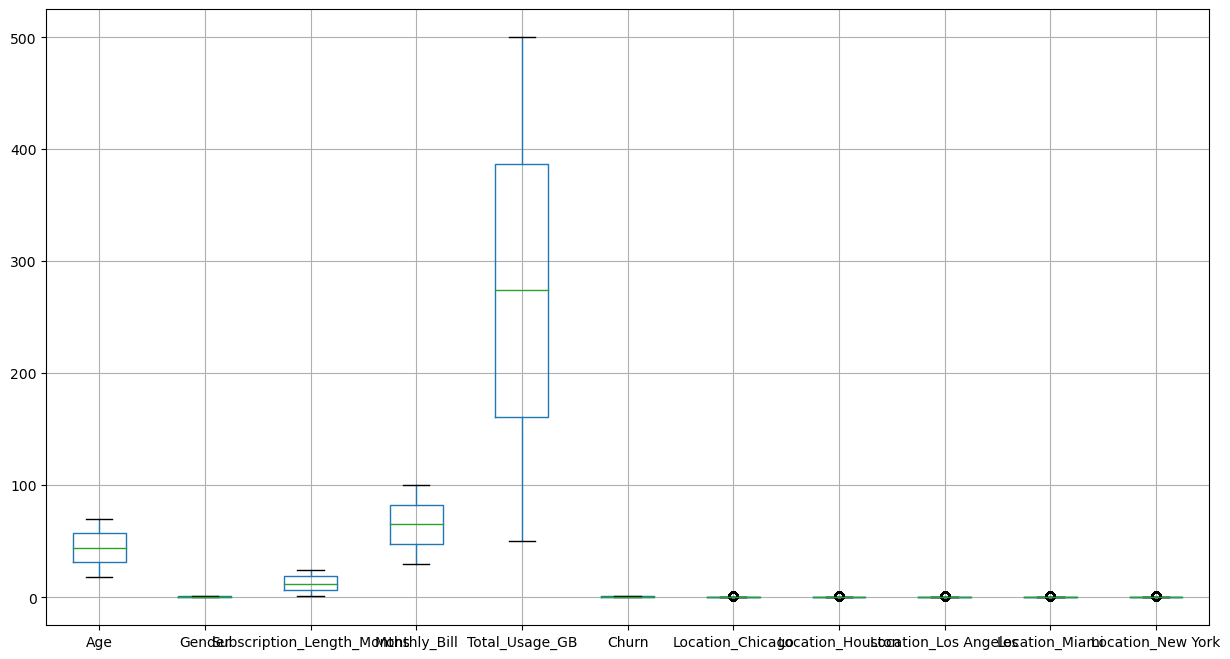

In [39]:
df.boxplot(figsize=(15,8))

In [40]:
# As shown in above boxplot there is no outliers are detected.
# Now cross checking it by IQI Method using the detect_outlier function.

## 1. Age

Boxplot before imputation:


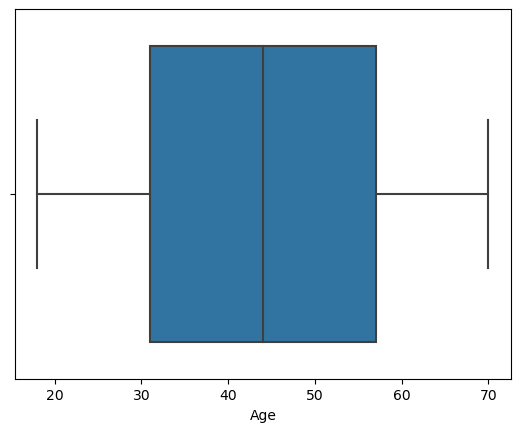

Outliers:
 Series([], Name: Age, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Age':
1. Maximum value: 70
2. Minimum value: 18
3. Uppertail value: 96.0
4. Lowertail value: -8.0
5. Mean value: 44.02702
6. Median value: 44.0
7. For Total datapoints: Q1= 31.0, Q2= 44.0, Q3= 57.0


In [41]:
detect_outlier('Age')

## 2. Gender

Boxplot before imputation:


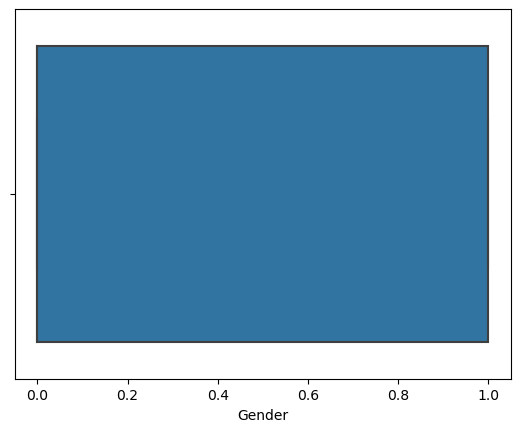

Outliers:
 Series([], Name: Gender, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Gender':
1. Maximum value: 1
2. Minimum value: 0
3. Uppertail value: 2.5
4. Lowertail value: -1.5
5. Mean value: 0.49784
6. Median value: 0.0
7. For Total datapoints: Q1= 0.0, Q2= 0.0, Q3= 1.0


In [42]:
detect_outlier('Gender')

## 3. Subscription_Length_Months

Boxplot before imputation:


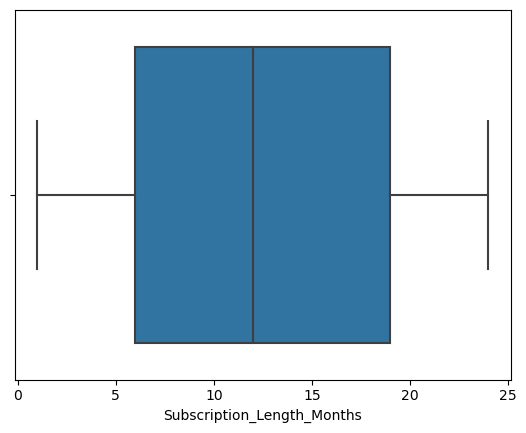

Outliers:
 Series([], Name: Subscription_Length_Months, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Subscription_Length_Months':
1. Maximum value: 24
2. Minimum value: 1
3. Uppertail value: 38.5
4. Lowertail value: -13.5
5. Mean value: 12.4901
6. Median value: 12.0
7. For Total datapoints: Q1= 6.0, Q2= 12.0, Q3= 19.0


In [43]:
detect_outlier('Subscription_Length_Months')

## 4. Monthly_Bill

Boxplot before imputation:


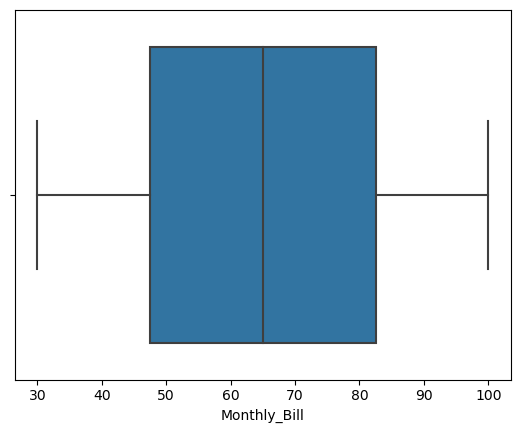

Outliers:
 Series([], Name: Monthly_Bill, dtype: float64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Monthly_Bill':
1. Maximum value: 100.0
2. Minimum value: 30.0
3. Uppertail value: 135.29000000000002
4. Lowertail value: -5.1100000000000065
5. Mean value: 65.05319680000062
6. Median value: 65.01
7. For Total datapoints: Q1= 47.54, Q2= 65.01, Q3= 82.64


In [44]:
detect_outlier('Monthly_Bill')

## 5. Total_Usage_GB

Boxplot before imputation:


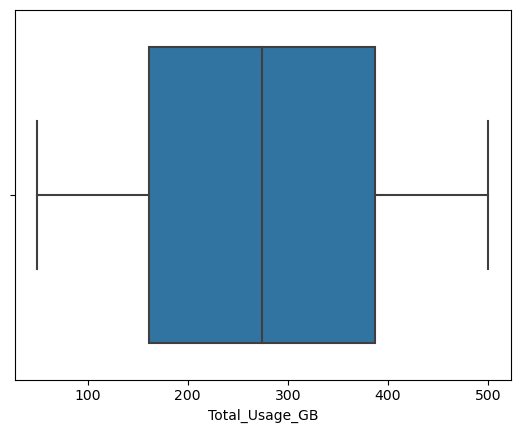

Outliers:
 Series([], Name: Total_Usage_GB, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Total_Usage_GB':
1. Maximum value: 500
2. Minimum value: 50
3. Uppertail value: 726.0
4. Lowertail value: -178.0
5. Mean value: 274.39365
6. Median value: 274.0
7. For Total datapoints: Q1= 161.0, Q2= 274.0, Q3= 387.0


In [45]:
detect_outlier('Total_Usage_GB')

## 6. Churn (Target Feature)

Boxplot before imputation:


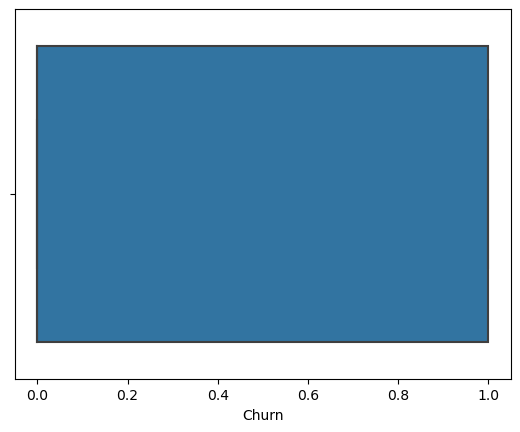

Outliers:
 Series([], Name: Churn, dtype: int64)
--------------------------------------------------------------------------------
Other Parameters from good-data of feature 'Churn':
1. Maximum value: 1
2. Minimum value: 0
3. Uppertail value: 2.5
4. Lowertail value: -1.5
5. Mean value: 0.49779
6. Median value: 0.0
7. For Total datapoints: Q1= 0.0, Q2= 0.0, Q3= 1.0


In [46]:
detect_outlier('Churn')

In [47]:
# Conclusion from outlier detection: There is no outliers in dataset.

# Step5: Feature selection

### 1.Filter Method
##### 1.1 Using Pearson corrleation

<AxesSubplot:>

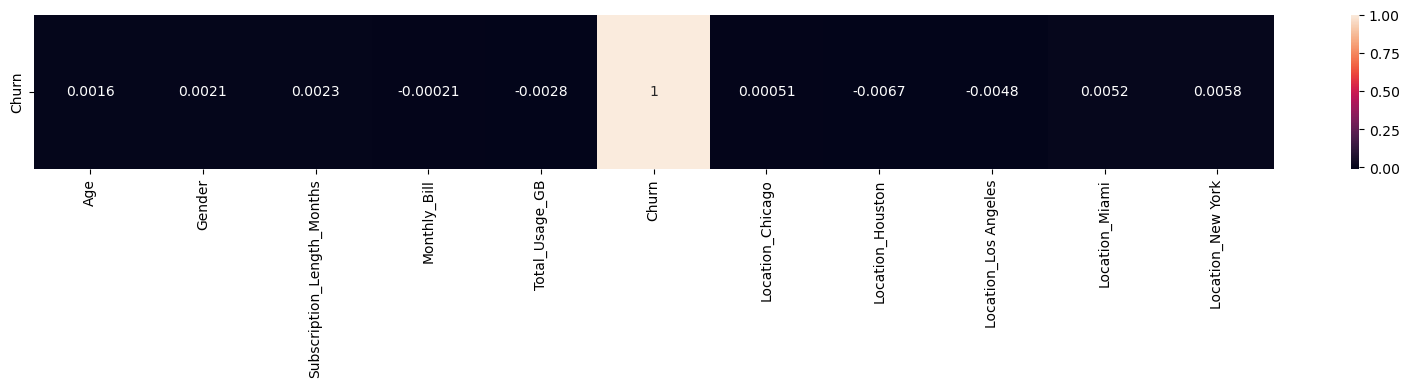

In [48]:
#1.Using Pearson corrleation
corr=df.corr().loc[['Churn']]
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

##### 1.2 Using Kendall corrleation

<AxesSubplot:>

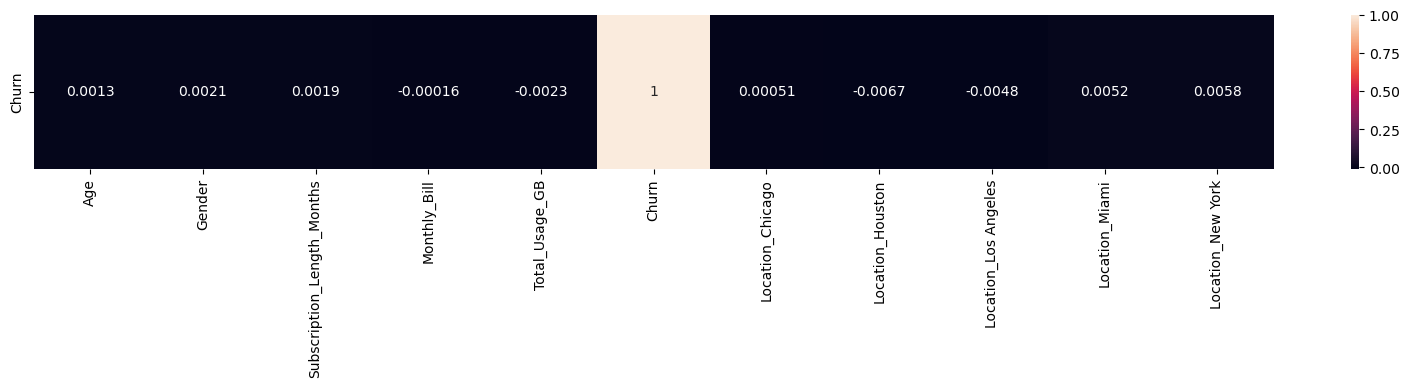

In [49]:
corr = df.corr(method='kendall').loc[['Churn']]
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

##### 1.3 varianceThreshold

In [50]:
x1 = df.drop(['Churn'], axis=1)
y1=df['Churn']

In [51]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold=0.0)
var_th.fit_transform(df)
print(var_th.get_feature_names_out(), len(var_th.get_feature_names_out()))

['Age' 'Gender' 'Subscription_Length_Months' 'Monthly_Bill'
 'Total_Usage_GB' 'Churn' 'Location_Chicago' 'Location_Houston'
 'Location_Los Angeles' 'Location_Miami' 'Location_New York'] 11


In [52]:
var_th.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [53]:
# It shows that there is no zero variance threshold.

##### 1.4 VIF(Variance Inflation Factor)

VIF Factors:


,VIF_Factor
Location_Houston,6.500591
Location_Miami,6.463627
Location_Los Angeles,6.453350
Location_Chicago,6.439758
Location_New York,6.393780
Monthly_Bill,1.000095
Subscription_Length_Months,1.000093
Age,1.000082
Gender,1.000048
Total_Usage_GB,1.000034



Visualisation of VIF Factors:
AxesSubplot(0.125,0.11;0.775x0.77)


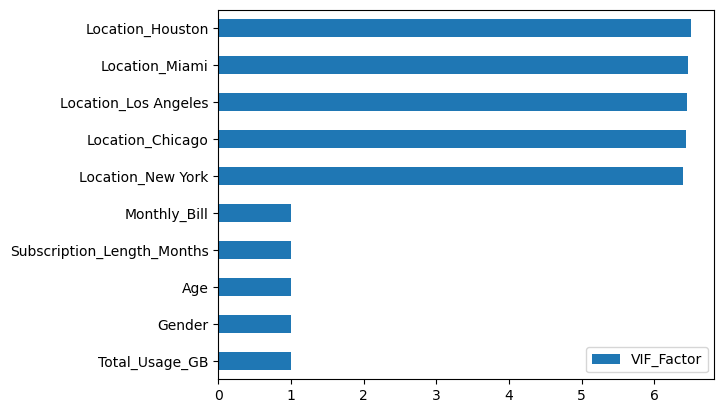

In [54]:
vif_factors_list=[]

for i in range(len(x1.columns)):
    vif=variance_inflation_factor(x1,i)
    vif_factors_list.append(vif)
    
vif_factors=pd.DataFrame(vif_factors_list, index=x1.columns, 
                         columns=['VIF_Factor']).sort_values(['VIF_Factor'],ascending=False)
print("VIF Factors:")
display(vif_factors)
print()
print("Visualisation of VIF Factors:")
print(vif_factors.sort_values(['VIF_Factor']).plot(kind = 'barh'))

In [55]:
# From above plot the VIF factors are in moderate range.

##### 1.5 Annova Test-(F-Test)

In [56]:
from sklearn.feature_selection import f_classif

In [57]:
f_val, p_val = f_classif(x1, y1)

df0 = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)}, index=x1.columns)
df0

,f_val,p_val
Age,0.242999,0.62205
Gender,0.449834,0.50242
Subscription_Length_Months,0.542063,0.46158
Monthly_Bill,0.004465,0.94673
Total_Usage_GB,0.807423,0.36889
Location_Chicago,0.025579,0.87293
Location_Houston,4.526703,0.03337
Location_Los Angeles,2.310564,0.12850
Location_Miami,2.740999,0.09781
Location_New York,3.404714,0.06501


In [58]:
# From above test p_val of Location_Houston is less than 0.05. So, only feature Location_Houston and Churn are dependent.

###### 1.6 information Gain

In [59]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

<AxesSubplot:>

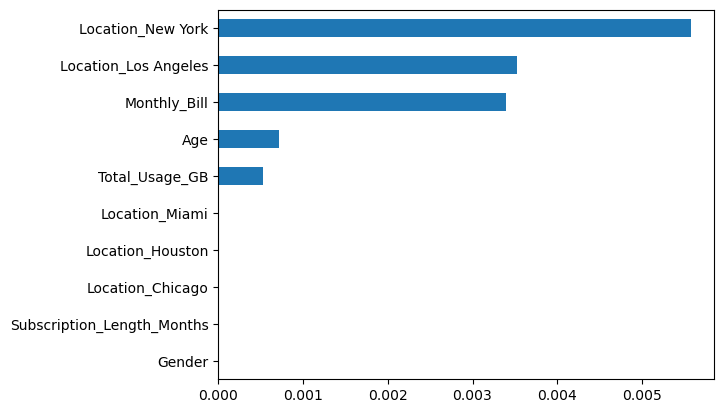

In [60]:
array1 = mutual_info_regression(x1,y1)

s2 = pd.Series(array1, index=x1.columns)
s2.sort_values().plot(kind = 'barh')

#### 2. Wrapper Method

##### 2.1 Bi-directional Feature Selection

In [63]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [64]:
log =LogisticRegression()

sfs = SequentialFeatureSelector(log, k_features= 10, forward=True, cv=5, n_jobs=-2)

sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(10, 10),
                          n_jobs=-2, scoring='accuracy')

In [65]:
df1=pd.DataFrame(sfs.subsets_).T
df1

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[0.5031, 0.50305, 0.50315, 0.50125, 0.50775]",0.50366,"(Location_New York,)"
2,"(8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Miami, Location_New York)"
3,"(6, 8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Houston, Location_Miami, Location_Ne..."
4,"(3, 6, 8, 9)","[0.5049, 0.5034, 0.50205, 0.5038, 0.5108]",0.50499,"(Monthly_Bill, Location_Houston, Location_Miam..."
5,"(0, 3, 6, 8, 9)","[0.5048, 0.5034, 0.50205, 0.50395, 0.5115]",0.50514,"(Age, Monthly_Bill, Location_Houston, Location..."
6,"(0, 3, 6, 7, 8, 9)","[0.50295, 0.5034, 0.50205, 0.50395, 0.51055]",0.50458,"(Age, Monthly_Bill, Location_Houston, Location..."
7,"(0, 1, 3, 6, 7, 8, 9)","[0.5034, 0.5034, 0.5032, 0.50395, 0.5106]",0.50491,"(Age, Gender, Monthly_Bill, Location_Houston, ..."
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.50305, 0.4981, 0.50205, 0.5042, 0.51105]",0.50369,"(Age, Gender, Monthly_Bill, Location_Chicago, ..."
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[0.50135, 0.4981, 0.502, 0.50275, 0.51085]",0.50301,"(Age, Gender, Subscription_Length_Months, Mont..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.5043, 0.4988, 0.5015, 0.49935, 0.5072]",0.50223,"(Age, Gender, Subscription_Length_Months, Mont..."


In [66]:
a=(df1['avg_score'].values)
max_index=np.where(a==a.max())[0][-1]
max_index

4

In [67]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.50514


In [68]:
# List of features which give highest accuracy by this method
f1=list((df1.iloc[(max_index),[3]])[0])
f1

['Age',
 'Monthly_Bill',
 'Location_Houston',
 'Location_Miami',
 'Location_New York']

In [ ]:
# Now storing this list
f1 = ['Age', 'Monthly_Bill', 'Location_Houston', 'Location_Miami', 'Location_New York']

In [69]:
log=LogisticRegression()

sfs = SequentialFeatureSelector(log, k_features= 1, forward=False, cv=5, n_jobs=-2)

sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 1), n_jobs=-2, scoring='accuracy')

In [70]:
df2=pd.DataFrame(sfs.subsets_).T
df2

,feature_idx,cv_scores,avg_score,feature_names
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.5043, 0.4988, 0.5015, 0.49935, 0.5072]",0.50223,"(Age, Gender, Subscription_Length_Months, Mont..."
9,"(0, 1, 2, 3, 5, 6, 7, 8, 9)","[0.50135, 0.4981, 0.502, 0.50275, 0.51085]",0.50301,"(Age, Gender, Subscription_Length_Months, Mont..."
8,"(0, 1, 3, 5, 6, 7, 8, 9)","[0.50305, 0.4981, 0.50205, 0.5042, 0.51105]",0.50369,"(Age, Gender, Monthly_Bill, Location_Chicago, ..."
7,"(0, 1, 3, 6, 7, 8, 9)","[0.5034, 0.5034, 0.5032, 0.50395, 0.5106]",0.50491,"(Age, Gender, Monthly_Bill, Location_Houston, ..."
6,"(0, 3, 6, 7, 8, 9)","[0.50295, 0.5034, 0.50205, 0.50395, 0.51055]",0.50458,"(Age, Monthly_Bill, Location_Houston, Location..."
5,"(0, 3, 6, 8, 9)","[0.5048, 0.5034, 0.50205, 0.50395, 0.5115]",0.50514,"(Age, Monthly_Bill, Location_Houston, Location..."
4,"(3, 6, 8, 9)","[0.5049, 0.5034, 0.50205, 0.5038, 0.5108]",0.50499,"(Monthly_Bill, Location_Houston, Location_Miam..."
3,"(6, 8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Houston, Location_Miami, Location_Ne..."
2,"(8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Miami, Location_New York)"
1,"(9,)","[0.5031, 0.50305, 0.50315, 0.50125, 0.50775]",0.50366,"(Location_New York,)"


In [71]:
a=(df2['avg_score'].values)
max_index=np.where(a==a.max())[0][0]
max_index

5

In [72]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.50514


In [73]:
# List of features which give highest accuracy by this method
f2=list((df2.iloc[(max_index),[3]])[0])
f2          

['Age',
 'Monthly_Bill',
 'Location_Houston',
 'Location_Miami',
 'Location_New York']

In [ ]:
# Now storing this list
f2 = ['Age', 'Monthly_Bill', 'Location_Houston', 'Location_Miami', 'Location_New York']

In [74]:
knn = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn, k_features= 10, forward=True, cv=5, n_jobs=-2) 

sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(10, 10),
                          n_jobs=-2, scoring='accuracy')

In [75]:
df3=pd.DataFrame(sfs.subsets_).T
df3

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[0.49775, 0.50305, 0.50315, 0.50125, 0.50775]",0.50259,"(Location_New York,)"
2,"(8, 9)","[0.49775, 0.5034, 0.50205, 0.50395, 0.51005]",0.50344,"(Location_Miami, Location_New York)"
3,"(6, 8, 9)","[0.49775, 0.5034, 0.50205, 0.50395, 0.51005]",0.50344,"(Location_Houston, Location_Miami, Location_Ne..."
4,"(6, 7, 8, 9)","[0.49775, 0.4981, 0.50655, 0.5025, 0.5109]",0.50316,"(Location_Houston, Location_Los Angeles, Locat..."
5,"(5, 6, 7, 8, 9)","[0.49775, 0.5031, 0.49725, 0.5049, 0.50535]",0.50167,"(Location_Chicago, Location_Houston, Location_..."
6,"(1, 5, 6, 7, 8, 9)","[0.49775, 0.5015, 0.49505, 0.50825, 0.5007]",0.50065,"(Gender, Location_Chicago, Location_Houston, L..."
7,"(0, 1, 5, 6, 7, 8, 9)","[0.50145, 0.5006, 0.5041, 0.50475, 0.5017]",0.50252,"(Age, Gender, Location_Chicago, Location_Houst..."
8,"(0, 1, 4, 5, 6, 7, 8, 9)","[0.5014, 0.49915, 0.49855, 0.5042, 0.50175]",0.50101,"(Age, Gender, Total_Usage_GB, Location_Chicago..."
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.50175, 0.49685, 0.50165, 0.5037, 0.5051]",0.50181,"(Age, Gender, Monthly_Bill, Total_Usage_GB, Lo..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.4993, 0.49665, 0.5095, 0.50395, 0.49965]",0.50181,"(Age, Gender, Subscription_Length_Months, Mont..."


In [76]:
a=(df3['avg_score'].values)
max_index=np.where(a==a.max())[0][-1]
max_index

2

In [77]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.5034400000000001


In [78]:
# List of features which give highest accuracy by this method
f3=list((df3.iloc[(max_index),[3]])[0])
f3          

['Location_Houston', 'Location_Miami', 'Location_New York']

In [ ]:
# Now storing this list
f3 = ['Location_Houston', 'Location_Miami', 'Location_New York']

In [79]:
knn = KNeighborsClassifier()

sfs = SequentialFeatureSelector(knn, k_features= 1, forward=False, cv=5, n_jobs=-2)

sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), forward=False,
                          k_features=(1, 1), n_jobs=-2, scoring='accuracy')

In [80]:
df4=pd.DataFrame(sfs.subsets_).T
df4

,feature_idx,cv_scores,avg_score,feature_names
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.4993, 0.49665, 0.5095, 0.50395, 0.49965]",0.50181,"(Age, Gender, Subscription_Length_Months, Mont..."
9,"(0, 1, 2, 3, 4, 5, 7, 8, 9)","[0.49975, 0.4964, 0.5093, 0.5047, 0.5004]",0.50211,"(Age, Gender, Subscription_Length_Months, Mont..."
8,"(0, 1, 2, 3, 4, 5, 8, 9)","[0.4997, 0.4974, 0.5089, 0.5046, 0.49995]",0.50211,"(Age, Gender, Subscription_Length_Months, Mont..."
7,"(0, 1, 2, 3, 4, 5, 8)","[0.4975, 0.49695, 0.5096, 0.5046, 0.501]",0.50193,"(Age, Gender, Subscription_Length_Months, Mont..."
6,"(0, 1, 2, 3, 4, 8)","[0.4986, 0.49795, 0.50865, 0.50455, 0.50035]",0.50202,"(Age, Gender, Subscription_Length_Months, Mont..."
5,"(0, 2, 3, 4, 8)","[0.4973, 0.49865, 0.50845, 0.5041, 0.5001]",0.50172,"(Age, Subscription_Length_Months, Monthly_Bill..."
4,"(0, 3, 4, 8)","[0.50105, 0.4973, 0.5026, 0.5027, 0.50515]",0.50176,"(Age, Monthly_Bill, Total_Usage_GB, Location_M..."
3,"(0, 3, 4)","[0.5008, 0.49855, 0.5034, 0.5042, 0.50455]",0.5023,"(Age, Monthly_Bill, Total_Usage_GB)"
2,"(0, 4)","[0.4967, 0.5018, 0.50175, 0.4996, 0.5073]",0.50143,"(Age, Total_Usage_GB)"
1,"(4,)","[0.50425, 0.504, 0.50085, 0.4979, 0.50475]",0.50235,"(Total_Usage_GB,)"


In [81]:
a=(df4['avg_score'].values)
max_index=np.where(a==a.max())[0][0]
max_index

9

In [82]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.50235


In [83]:
# List of features which give highest accuracy by this method
f4=list((df4.iloc[(max_index),[3]])[0])
f4          

['Total_Usage_GB']

In [ ]:
# Now storing this list
f4 = ['Total_Usage_GB']

In [84]:
dt = DecisionTreeClassifier()

sfs = SequentialFeatureSelector(dt, k_features= 10, forward=True, cv=5, n_jobs=-2)
sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(10, 10), n_jobs=-2, scoring='accuracy')

In [85]:
df5=pd.DataFrame(sfs.subsets_).T
df5

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)","[0.5031, 0.50305, 0.50315, 0.50125, 0.50775]",0.50366,"(Location_New York,)"
2,"(8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Miami, Location_New York)"
3,"(6, 8, 9)","[0.5049, 0.5034, 0.50205, 0.50395, 0.51005]",0.50487,"(Location_Houston, Location_Miami, Location_Ne..."
4,"(5, 6, 8, 9)","[0.5049, 0.4981, 0.50205, 0.50395, 0.51005]",0.50381,"(Location_Chicago, Location_Houston, Location_..."
5,"(5, 6, 7, 8, 9)","[0.5049, 0.4981, 0.50205, 0.50395, 0.51005]",0.50381,"(Location_Chicago, Location_Houston, Location_..."
6,"(3, 5, 6, 7, 8, 9)","[0.5012, 0.49855, 0.50435, 0.50385, 0.5035]",0.50229,"(Monthly_Bill, Location_Chicago, Location_Hous..."
7,"(1, 3, 5, 6, 7, 8, 9)","[0.5023, 0.50065, 0.5042, 0.5043, 0.50315]",0.50292,"(Gender, Monthly_Bill, Location_Chicago, Locat..."
8,"(1, 3, 4, 5, 6, 7, 8, 9)","[0.50815, 0.50415, 0.50125, 0.5006, 0.5057]",0.50397,"(Gender, Monthly_Bill, Total_Usage_GB, Locatio..."
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.5006, 0.5016, 0.4998, 0.4973, 0.50575]",0.50101,"(Age, Gender, Monthly_Bill, Total_Usage_GB, Lo..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.5051, 0.50125, 0.50085, 0.5027, 0.49865]",0.50171,"(Age, Gender, Subscription_Length_Months, Mont..."


In [86]:
a=(df5['avg_score'].values)
max_index=np.where(a==a.max())[0][-1]
max_index

2

In [87]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.50487


In [88]:
# List of features which give highest accuracy by this method
f5=list((df5.iloc[(max_index),[3]])[0])
f5          

['Location_Houston', 'Location_Miami', 'Location_New York']

In [ ]:
# Now storing this list
f5 = ['Location_Houston', 'Location_Miami', 'Location_New York']

In [89]:
dt = DecisionTreeClassifier()

sfs = SequentialFeatureSelector(dt, k_features= 1, forward=False, cv=5, n_jobs=-2)

sfs.fit(x1, y1)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), forward=False,
                          k_features=(1, 1), n_jobs=-2, scoring='accuracy')

In [90]:
df6=pd.DataFrame(sfs.subsets_).T
df6

,feature_idx,cv_scores,avg_score,feature_names
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.50645, 0.50305, 0.5002, 0.50505, 0.50275]",0.5035,"(Age, Gender, Subscription_Length_Months, Mont..."
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)","[0.506, 0.5038, 0.501, 0.50495, 0.49995]",0.50314,"(Age, Gender, Subscription_Length_Months, Mont..."
8,"(0, 1, 2, 3, 4, 5, 6, 8)","[0.50425, 0.50635, 0.50115, 0.50585, 0.5002]",0.50356,"(Age, Gender, Subscription_Length_Months, Mont..."
7,"(0, 1, 2, 3, 4, 5, 8)","[0.5022, 0.50335, 0.49965, 0.50515, 0.5026]",0.50259,"(Age, Gender, Subscription_Length_Months, Mont..."
6,"(0, 1, 2, 3, 4, 5)","[0.5045, 0.4932, 0.50535, 0.50215, 0.50525]",0.50209,"(Age, Gender, Subscription_Length_Months, Mont..."
5,"(0, 1, 2, 4, 5)","[0.49875, 0.49485, 0.50195, 0.5086, 0.50625]",0.50208,"(Age, Gender, Subscription_Length_Months, Tota..."
4,"(0, 1, 4, 5)","[0.4989, 0.505, 0.50145, 0.50155, 0.50295]",0.50197,"(Age, Gender, Total_Usage_GB, Location_Chicago)"
3,"(0, 1, 5)","[0.49855, 0.50085, 0.5044, 0.50085, 0.49985]",0.5009,"(Age, Gender, Location_Chicago)"
2,"(0, 1)","[0.50385, 0.5037, 0.50805, 0.50455, 0.5057]",0.50517,"(Age, Gender)"
1,"(0,)","[0.5014, 0.50435, 0.5061, 0.4989, 0.5027]",0.50269,"(Age,)"


In [91]:
a=(df6['avg_score'].values)
max_index=np.where(a==a.max())[0][0]
max_index

8

In [92]:
# Highest accuracy
print("Highest accuracy=", a.max())

Highest accuracy= 0.50517


In [93]:
# List of features which give highest accuracy by this method
f6=list((df6.iloc[(max_index),[3]])[0])
f6          

['Age', 'Gender']

In [62]:
# Now storing this list
f6 = ['Age', 'Gender']

## Conclusion: 

In [63]:
""" 
    From the above Feature selection techniques, it is conclude that there is 
    not much significant effect are on accuracy change, wheather it lies within 50% to 51%.
    So, we are go with all features in this scenario.
"""

' \n    From the above Feature selection techniques, it is conclude that there is \n    not much significant effect are on accuracy change, wheather it lies within 50% to 51%.\n    So, we are go with all features in this scenario.\n'

## Scalling the dataset for KNN Algorithm

In [64]:
x = df.drop("Churn", axis=1)
y = df['Churn']
x

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,1
2,24,0,5,85.47,460,0,0,1,0,0
3,36,0,3,97.94,297,0,0,0,1,0
4,46,0,19,58.14,266,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,33,1,23,55.13,226,0,1,0,0,0
99996,62,0,19,61.65,351,0,0,0,0,1
99997,64,1,17,96.11,251,1,0,0,0,0
99998,51,0,20,49.25,434,0,0,0,0,1


##### 1.standrdization

In [65]:
# Standardization Method-1 (Short & easy steps)

std_scaler = StandardScaler()

x_std = std_scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=x.columns)
x_std

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1.241670,1.004329,0.651115,0.410606,-0.294289,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
1,1.176226,-0.995689,-1.658879,-0.805374,-0.784852,-0.499344,-0.502452,-0.500641,-0.500484,2.011763
2,-1.310651,-0.995689,-1.081380,1.009204,1.422681,-0.499344,-0.502452,1.997441,-0.500484,-0.497076
3,-0.525321,-0.995689,-1.370129,1.625597,0.173279,-0.499344,-0.502452,-0.500641,1.998065,-0.497076
4,0.129120,-0.995689,0.939864,-0.341720,-0.064338,-0.499344,-0.502452,-0.500641,1.998065,-0.497076
...,...,...,...,...,...,...,...,...,...,...
99995,-0.721654,1.004329,1.517363,-0.490504,-0.370939,-0.499344,1.990240,-0.500641,-0.500484,-0.497076
99996,1.176226,-0.995689,0.939864,-0.168220,0.587191,-0.499344,-0.502452,-0.500641,-0.500484,2.011763
99997,1.307115,1.004329,0.651115,1.535140,-0.179313,2.002629,-0.502452,-0.500641,-0.500484,-0.497076
99998,0.456341,-0.995689,1.084239,-0.781153,1.223390,-0.499344,-0.502452,-0.500641,-0.500484,2.011763


# 2.Normalization

In [66]:
# Normalization Method-1 (Short & easy steps)

norm_scaler = MinMaxScaler()

x_norm = norm_scaler.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)
x_norm

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,0.865385,1.0,0.695652,0.619429,0.413333,0.0,0.0,1.0,0.0,0.0
1,0.846154,0.0,0.000000,0.268000,0.271111,0.0,0.0,0.0,0.0,1.0
2,0.115385,0.0,0.173913,0.792429,0.911111,0.0,0.0,1.0,0.0,0.0
3,0.346154,0.0,0.086957,0.970571,0.548889,0.0,0.0,0.0,1.0,0.0
4,0.538462,0.0,0.782609,0.402000,0.480000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,1.0,0.956522,0.359000,0.391111,0.0,1.0,0.0,0.0,0.0
99996,0.846154,0.0,0.782609,0.452143,0.668889,0.0,0.0,0.0,0.0,1.0
99997,0.884615,1.0,0.695652,0.944429,0.446667,1.0,0.0,0.0,0.0,0.0
99998,0.634615,0.0,0.826087,0.275000,0.853333,0.0,0.0,0.0,0.0,1.0


# Step 6: Model Building & Evaluation

# [1] Logistic Regression

##### Train Test spliting of data

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10, stratify=y)

In [68]:
#Model fitting
# Create an instance

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# Training Accuracy
y_pred_train = log_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train,labels=log_model.classes_)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

accuracy_train_log = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy_train_log)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[22332 15334]
 [21852 15482]]
*********************************************
Accuracy:  0.5041866666666667
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.55     37666
           1       0.50      0.41      0.45     37334

    accuracy                           0.50     75000
   macro avg       0.50      0.50      0.50     75000
weighted avg       0.50      0.50      0.50     75000



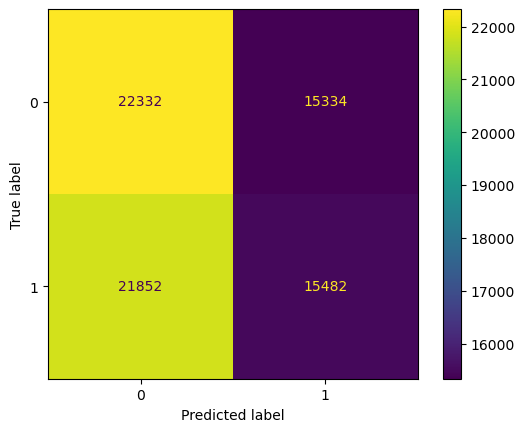

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [71]:
# testing Accuracy
y_pred = log_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*45)

# visualization also

accuracy_test_log = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy_test_log)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[7354 5201]
 [7189 5256]]
*********************************************
Accuracy:  0.5044
*********************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.54     12555
           1       0.50      0.42      0.46     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



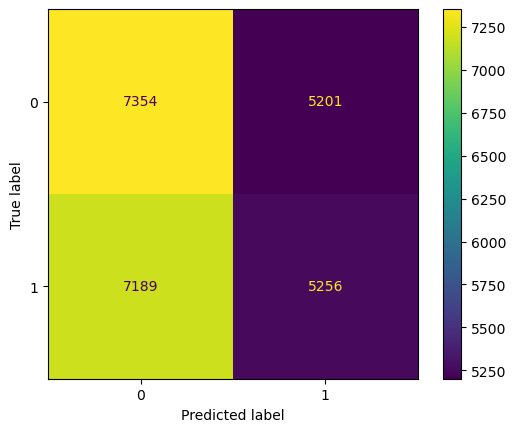

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [73]:
#AUC-ROC Curve for logistic Regression

In [74]:
y_train_pred_prob = log_model.predict_proba(x_train)   # Plot AUC- ROC curve on Training data
y_train_pred_prob[:,1]


fpr, tpr, thresh = roc_curve(y_train, y_train_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

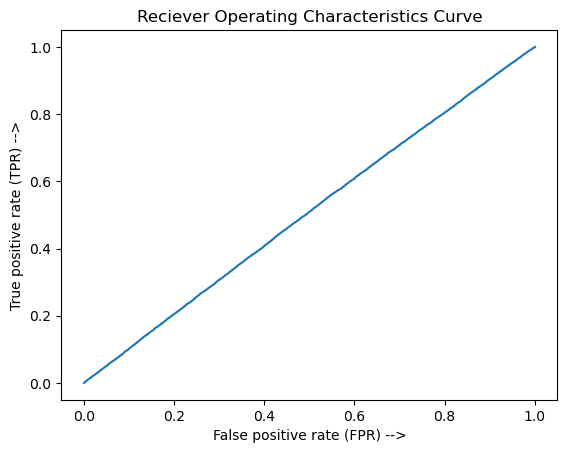

In [75]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR) -->")
plt.ylabel("True positive rate (TPR) -->")
plt.title("Reciever Operating Characteristics Curve")

In [76]:
auc_value = auc(fpr, tpr)
auc_value

0.5059425840027341

In [77]:
df1 = pd.DataFrame()
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in  threshold:
    preds = (log_model.predict_proba(x_test)[:,1] > i).astype(int)

    df2 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)],
                index=["Accuracy", "recall", "Precision", "F1-Score"])
    
    df1 = pd.concat([df1,df2], axis = 1)
else:
    df1.columns=threshold
    
df1.T

,Accuracy,recall,Precision,F1-Score
0.1,0.4978,1.000000,0.49780,0.664708
0.2,0.4978,1.000000,0.49780,0.664708
0.3,0.4978,1.000000,0.49780,0.664708
0.4,0.4978,1.000000,0.49780,0.664708
0.5,0.5044,0.422338,0.50263,0.458999
0.6,0.5022,0.000000,0.00000,0.000000
0.7,0.5022,0.000000,0.00000,0.000000
0.8,0.5022,0.000000,0.00000,0.000000
0.9,0.5022,0.000000,0.00000,0.000000


In [78]:
# Here as per buiseness requirement, we can tune the value of 
# threshould to obtain better value of recall precision, f1_score.

### Results of logistic regression

In [79]:
results_log=pd.DataFrame(
{'Model':['Logistic Regression Model'],
 'Accuracy (Train)':[accuracy_train_log],
 'Accuracy (Test)':[accuracy_test_log],
 'Precision (Test)':[precision_score(y_test, y_pred)],
 'Recall (Test)':[recall_score(y_test, y_pred)],
 'F1 Score (Test)':[f1_score(y_test, y_pred)],
})
display(results_log)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Logistic Regression Model,0.504187,0.5044,0.50263,0.422338,0.458999


# [2] K-Nearest Neighbour 

## 1) Standardization

##### Train Test spliting of data

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25, random_state=10, stratify=y)

In [81]:
# create an instance of model

knn_std = KNeighborsClassifier()
knn_std.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
# Training Data

y_pred_train = knn_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_knn_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_knn_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[26113 11553]
 [11846 25488]]
************************************************************
Accuracy is --> 0.6880133333333334
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     37666
           1       0.69      0.68      0.69     37334

    accuracy                           0.69     75000
   macro avg       0.69      0.69      0.69     75000
weighted avg       0.69      0.69      0.69     75000



In [83]:
# Testing Data

y_pred = knn_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_knn_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_knn_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_knn_std = precision_score(y_test, y_pred)
recall_knn_std = recall_score(y_test, y_pred)
f1_score_knn_std = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[6273 6282]
 [6303 6142]]
************************************************************
Accuracy is --> 0.4966
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     12555
           1       0.49      0.49      0.49     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



# Hyperparameter Tunning

In [84]:
param_grid = {"n_neighbors" : np.arange(3,15),
                  "p": [1,2]} # Param_grid

gscv_knn_std = GridSearchCV(knn_std, param_grid, cv=7, n_jobs=-1)

gscv_knn_std.fit(x_train, y_train) 

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

In [85]:
gscv_knn_std.best_params_

{'n_neighbors': 4, 'p': 2}

In [86]:
# Training Data

y_pred_train = gscv_knn_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_gscv_knn_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_gscv_knn_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[32926  4740]
 [18719 18615]]
************************************************************
Accuracy is --> 0.6872133333333333
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.64      0.87      0.74     37666
           1       0.80      0.50      0.61     37334

    accuracy                           0.69     75000
   macro avg       0.72      0.69      0.68     75000
weighted avg       0.72      0.69      0.68     75000



In [87]:
# Testing Accuracy

y_pred = gscv_knn_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_gscv_knn_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_gscv_knn_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_gscv_knn_std = precision_score(y_test, y_pred)
recall_gscv_knn_std = recall_score(y_test, y_pred)
f1_score_gscv_knn_std = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[8622 3933]
 [8569 3876]]
************************************************************
Accuracy is --> 0.49992
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.69      0.58     12555
           1       0.50      0.31      0.38     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.48     25000
weighted avg       0.50      0.50      0.48     25000



## 2) Normalization

##### Train Test spliting of data

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=10, stratify=y)
x_train

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
77974,0.903846,0.0,0.956522,0.806571,0.217778,0.0,0.0,0.0,1.0,0.0
73069,0.480769,0.0,0.695652,0.938857,0.228889,0.0,0.0,1.0,0.0,0.0
26531,0.230769,1.0,0.521739,0.299429,0.577778,0.0,1.0,0.0,0.0,0.0
924,0.788462,1.0,0.521739,0.806429,0.142222,1.0,0.0,0.0,0.0,0.0
59010,0.576923,0.0,0.173913,0.413286,0.866667,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35338,0.634615,0.0,0.826087,0.645000,0.875556,0.0,0.0,0.0,0.0,1.0
14674,0.173077,0.0,0.086957,0.476571,0.566667,0.0,0.0,1.0,0.0,0.0
49765,0.750000,1.0,0.434783,0.552857,0.568889,1.0,0.0,0.0,0.0,0.0
54745,0.673077,0.0,0.217391,0.470571,0.393333,0.0,0.0,1.0,0.0,0.0


In [89]:
# create an instance of model

knn_norm = KNeighborsClassifier()
knn_norm.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
# Training Data

y_pred_train = knn_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_knn_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_knn_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[26059 11607]
 [11813 25521]]
************************************************************
Accuracy is --> 0.6877333333333333
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     37666
           1       0.69      0.68      0.69     37334

    accuracy                           0.69     75000
   macro avg       0.69      0.69      0.69     75000
weighted avg       0.69      0.69      0.69     75000



In [91]:
# Testing Data

y_pred = knn_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_knn_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_knn_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_knn_norm = precision_score(y_test, y_pred)
recall_knn_norm = recall_score(y_test, y_pred)
f1_score_knn_norm = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[6289 6266]
 [6305 6140]]
************************************************************
Accuracy is --> 0.49716
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     12555
           1       0.49      0.49      0.49     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



# Hyperparameter Tunning

In [92]:
param_grid = {"n_neighbors" : np.arange(3,15),
                  "p": [1,2]} # Param_grid

gscv_knn_norm = GridSearchCV(knn_norm, param_grid, cv=7, n_jobs=-1)

gscv_knn_norm.fit(x_train, y_train) 

GridSearchCV(cv=7, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

In [93]:
gscv_knn_norm.best_params_

{'n_neighbors': 6, 'p': 1}

In [94]:
# Training Data

y_pred_train = gscv_knn_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_gscv_knn_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_gscv_knn_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[30737  6929]
 [18755 18579]]
************************************************************
Accuracy is --> 0.6575466666666666
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.62      0.82      0.71     37666
           1       0.73      0.50      0.59     37334

    accuracy                           0.66     75000
   macro avg       0.67      0.66      0.65     75000
weighted avg       0.67      0.66      0.65     75000



In [95]:
# Testing Accuracy

y_pred = gscv_knn_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_gscv_knn_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_gscv_knn_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_gscv_knn_norm = precision_score(y_test, y_pred)
recall_gscv_knn_norm = recall_score(y_test, y_pred)
f1_score_gscv_knn_norm = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[8264 4291]
 [8270 4175]]
************************************************************
Accuracy is --> 0.49756
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.66      0.57     12555
           1       0.49      0.34      0.40     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.48     25000
weighted avg       0.50      0.50      0.48     25000



### Results of knn

In [96]:
results_knn=pd.DataFrame(
{'Model':['Standardize KNN','Normalized KNN', 'GSCV STD KNN', 'GSCV Normal KNN' ],
 'Accuracy (Train)':[accurracy_train_knn_std,accurracy_train_knn_norm,accurracy_train_gscv_knn_std,accurracy_train_gscv_knn_norm],
 'Accuracy (Test)':[accurracy_test_knn_std, accurracy_test_knn_norm,accurracy_test_gscv_knn_std,accurracy_test_gscv_knn_norm],
 'Precision (Test)':[precision_knn_std, precision_knn_norm, precision_gscv_knn_std, precision_gscv_knn_norm],
 'Recall (Test)':[recall_knn_std, recall_knn_norm, recall_gscv_knn_std, recall_gscv_knn_norm],
 'F1 Score (Test)':[f1_score_knn_std, f1_score_knn_norm, f1_score_gscv_knn_std, f1_score_gscv_knn_norm],
})
display(results_knn)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Standardize KNN,0.688013,0.49660,0.494366,0.493532,0.493948
1,Normalized KNN,0.687733,0.49716,0.494922,0.493371,0.494145
2,GSCV STD KNN,0.687213,0.49992,0.496350,0.311450,0.382739
3,GSCV Normal KNN,0.657547,0.49756,0.493149,0.335476,0.399311


# [3] Decision Tree Algorithm

###  Spliting the Dataset

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [98]:
# creating instance & model fitting
dt_model=DecisionTreeClassifier(random_state=12)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

### Model Evaluation of DT

In [99]:
# Evaluation of Training Data
y_pred_train=dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_dt = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_dt)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[37688     0]
 [    0 37312]]
************************************************************
Accuracy is --> 1.0
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37688
           1       1.00      1.00      1.00     37312

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



In [100]:
# In DT training model is always overfitted.
# Hence we are doing prunning to overcome the overfitting.

In [101]:
# Evaluation of Testing Data
y_pred=dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_dt = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_dt)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_score_dt = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[6305 6228]
 [6323 6144]]
************************************************************
Accuracy is --> 0.49796
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     12533
           1       0.50      0.49      0.49     12467

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [102]:
# plt.figure(figsize=(250, 250))
# plot_tree(dt_model, feature_names=list(x.columns), filled=True, rounded=True, precision=3)
# print()

# It took high computation time, so skipping it for now.

## Prunning Technique

## 1. Hyperparameter Tunning (Pre-Prunning)

### GridSearchCV 

In [103]:
import time
t1 = time.time()

# Defined param_grid
param_grid = {"criterion":["gini", "entropy"], 
              "max_depth": np.arange(3,10),
              "min_samples_split": np.arange(1,15),
              "min_samples_leaf": np.arange(2,15),
             }                                          

# Create Instance & Model Fitting
gscv_dt = RandomizedSearchCV(dt_model, param_grid, cv=7, n_jobs=-1)
gscv_dt.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 7.44464373588562 sec


In [114]:
# best parameters from gridsearchcv
gscv_dt.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 4,
 'criterion': 'gini'}

#### Model Evaluation of GridSearchCV 

In [129]:
# Evaluation of Training Data
y_pred_train=gscv_dt.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_gscv_dt = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_gscv_dt)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[35009  2679]
 [34252  3060]]
************************************************************
Accuracy is --> 0.5075866666666666
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.51      0.93      0.65     37688
           1       0.53      0.08      0.14     37312

    accuracy                           0.51     75000
   macro avg       0.52      0.51      0.40     75000
weighted avg       0.52      0.51      0.40     75000



In [116]:
# Evaluation of Testing Data
y_pred=gscv_dt.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_gscv_dt = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_gscv_dt)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_gscv_dt = precision_score(y_test, y_pred)
recall_gscv_dt = recall_score(y_test, y_pred)
f1_score_gscv_dt = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[11615   918]
 [11515   952]]
************************************************************
Accuracy is --> 0.50268
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.93      0.65     12533
           1       0.51      0.08      0.13     12467

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.39     25000
weighted avg       0.51      0.50      0.39     25000



## 2. Post-Prunning: Cost Complexity Prunning

In [117]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 7.11111111e-06, 7.40740741e-06, ...,
       5.26073336e-05, 5.39981033e-05, 6.35421929e-05])

In [119]:
# Here we are not calculating best ccp_alpha, because this task requires high computation time.
# so skipping it for now.

In [118]:
# train_accuracy_list = []
# test_accuracy_list = []

# for i in ccp_alpha_list:
#     decision_tree_model = DecisionTreeClassifier(ccp_alpha=i, random_state=12)
#     decision_tree_model.fit(x_train, y_train)
    
#     training_accuracy = decision_tree_model.score(x_train, y_train)
#     train_accuracy_list.append(training_accuracy)
    
#     testing_accuracy = decision_tree_model.score(x_test, y_test)
#     test_accuracy_list.append(testing_accuracy)

In [120]:
# fig, ax = plt.subplots()
# ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
# ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
# ax.legend()

In [121]:
# max_test = test_accuracy_list.index(max(test_accuracy_list))
# max_test

In [122]:
# best_ccp = ccp_alpha_list[max_test]
# best_ccp

In [123]:
# # Now fit the model on best ccp
# dt_reg_ccp = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=2)

# dt_reg_ccp.fit(x_train, y_train)

In [124]:
# # Evaluation of Training Data
# y_pred_train=dt_reg_ccp.predict(x_train)

# cnf_matrix = confusion_matrix(y_train, y_pred_train)
# print("Confusion Matrix -->\n", cnf_matrix)
# print("*"*60)

# accurracy_train_ccp_dt = accuracy_score(y_train, y_pred_train)
# print("Accuracy is -->", accurracy_train_ccp_dt)
# print("*"*60)

# clf_report = classification_report(y_train, y_pred_train)
# print("Classification report -->\n",clf_report)

In [125]:
# # Evaluation of Testing Data
# y_pred=dt_reg_ccp.predict(x_test)

# cnf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix -->\n", cnf_matrix)
# print("*"*60)

# accurracy_test_ccp_dt = accuracy_score(y_test, y_pred)
# print("Accuracy is -->", accurracy_test_ccp_dt)
# print("*"*60)

# clf_report = classification_report(y_test, y_pred)
# print("Classification report -->\n",clf_report)

# precision_ccp_dt = precision_score(y_test, y_pred)
# recall_ccp_dt = recall_score(y_test, y_pred)
# f1_score_ccp_dt = f1_score(y_test, y_pred)

### Feature Selection Techniques

In [126]:
array = dt_model.feature_importances_
array

array([0.16377582, 0.02977919, 0.16014208, 0.31456688, 0.2584925 ,
       0.01795337, 0.00216925, 0.01766566, 0.01823395, 0.01722129])

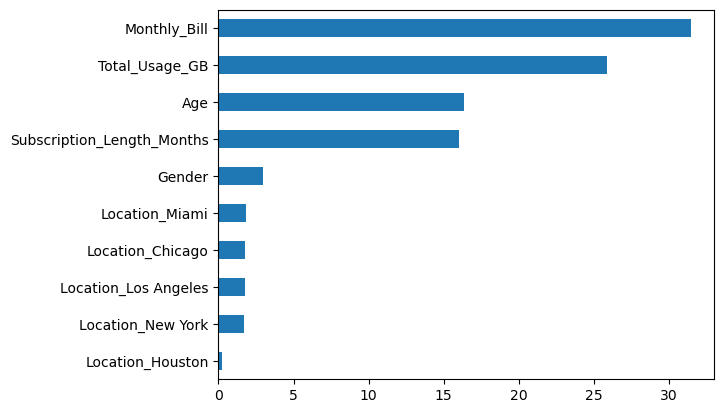

In [127]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [131]:
results_dt=pd.DataFrame(
{'Model':['Regular DT Model','gscv DT Model'],
 'Accuracy (Train)':[accurracy_train_dt, accurracy_train_gscv_dt],
 'Accuracy (Test)':[accurracy_test_dt, accurracy_test_gscv_dt],
  'Precision (Test)':[precision_dt, precision_gscv_dt],
 'Recall (Test)':[recall_dt, recall_gscv_dt],
 'F1 Score (Test)':[f1_score_dt, f1_score_gscv_dt],
})
display(results_dt)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Regular DT Model,1.000000,0.49796,0.496605,0.492821,0.494706
1,gscv DT Model,0.507587,0.50268,0.509091,0.076362,0.132803


# [4] Random Forest Algorithm

###  Spliting the Dataset

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [133]:
# creating instance & model fitting
rf=RandomForestClassifier(random_state=12)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=12)

### Model Evaluation of RF

In [134]:
# Evaluation of Training Data
y_pred_train=rf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rf = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rf)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[37688     0]
 [    0 37312]]
************************************************************
Accuracy is --> 1.0
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37688
           1       1.00      1.00      1.00     37312

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000



In [135]:
# Evaluation of Testing Data
y_pred=rf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rf = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rf)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[6560 5973]
 [6578 5889]]
************************************************************
Accuracy is --> 0.49796
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.52      0.51     12533
           1       0.50      0.47      0.48     12467

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [136]:
rf.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=1916507803)

In [137]:
# plt.figure(figsize=(250, 250))
# plot_tree(rf.estimators_[1], feature_names=x.columns, filled=True, rounded=True, precision=3)
# print()

# It took high computation time, so skipping it for now.

## Prunning Technique

## Hyperparameter Tunning (Pre-Prunning)

### RandomizedSearchCV 

In [140]:
import time
t1 = time.time()

# Defined param_grid

param_grid = {"n_estimators" : np.arange(10,100),
                 "criterion":["gini", "entropy"], 
                 "max_depth": np.arange(3,10),
                 "min_samples_split": np.arange(1,15),
                 "min_samples_leaf": np.arange(2,15), 
                 "max_features": ['sqrt', 'log2'],
             } 

# Create Instance & Model Fitting
rscv_rf = RandomizedSearchCV(rf, param_grid, cv=7, n_jobs=-1)
rscv_rf.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 318.79680848121643 sec


In [141]:
# best parameters from gridsearchcv
rscv_rf.best_params_

{'n_estimators': 67,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 6,
 'criterion': 'gini'}

#### Model Evaluation of GridSearchCV 

In [142]:
# Evaluation of Training Data
y_pred_train=rscv_rf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rscv_rf = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rscv_rf)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[27792  9896]
 [24218 13094]]
************************************************************
Accuracy is --> 0.5451466666666667
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.53      0.74      0.62     37688
           1       0.57      0.35      0.43     37312

    accuracy                           0.55     75000
   macro avg       0.55      0.54      0.53     75000
weighted avg       0.55      0.55      0.53     75000



In [143]:
# Evaluation of Testing Data
y_pred=rscv_rf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rscv_rf = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rscv_rf)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_rscv_rf = precision_score(y_test, y_pred)
recall_rscv_rf = recall_score(y_test, y_pred)
f1_score_rscv_rf = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[8789 3744]
 [8544 3923]]
************************************************************
Accuracy is --> 0.50848
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.51      0.70      0.59     12533
           1       0.51      0.31      0.39     12467

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.49     25000
weighted avg       0.51      0.51      0.49     25000



### Feature Selection Techniques

In [144]:
array = rf.feature_importances_
array

array([0.1959043 , 0.01430514, 0.14598058, 0.31971906, 0.2970124 ,
       0.00584979, 0.00471994, 0.00534873, 0.00517777, 0.00598229])

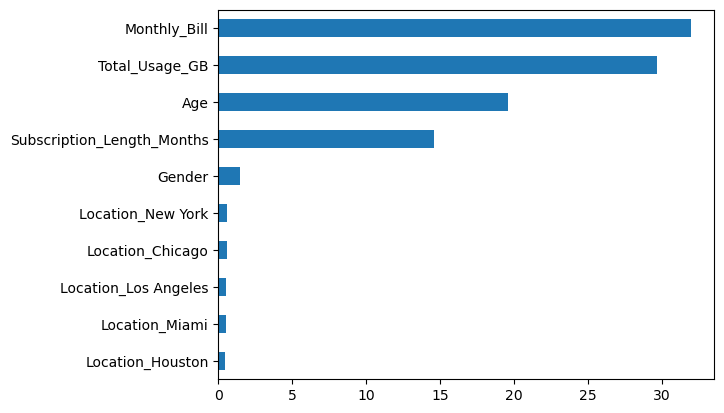

In [145]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [147]:
results_rf=pd.DataFrame(
{'Model':['Regular RF Model','gscv rf Model'],
 'Accuracy (Train)':[accurracy_train_rf, accurracy_train_rscv_rf],
 'Accuracy (Test)':[accurracy_test_rf, accurracy_test_rscv_rf],
 'Precision (Test)':[precision_rf, precision_rscv_rf],
 'Recall (Test)':[recall_rf, recall_rscv_rf],
 'F1 Score (Test)':[f1_score_rf, f1_score_rscv_rf],
})
display(results_rf)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Regular RF Model,1.000000,0.49796,0.496459,0.472367,0.484114
1,gscv rf Model,0.545147,0.50848,0.511673,0.314671,0.389689


# [5] Ada Boost Algorithm

###  Spliting the Dataset

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12)

In [149]:
# creating instance & model fitting
ada=AdaBoostClassifier(random_state=12)

ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=12)

### Model Evaluation of AdaBoost

In [150]:
# Evaluation of Training Data
y_pred_train=ada.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_ada = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_ada)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[23753 13935]
 [22403 14909]]
************************************************************
Accuracy is --> 0.5154933333333334
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.51      0.63      0.57     37688
           1       0.52      0.40      0.45     37312

    accuracy                           0.52     75000
   macro avg       0.52      0.51      0.51     75000
weighted avg       0.52      0.52      0.51     75000



In [151]:
# Evaluation of Testing Data
y_pred=ada.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_ada = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_ada)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_ada = precision_score(y_test, y_pred)
recall_ada = recall_score(y_test, y_pred)
f1_score_ada = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[7727 4806]
 [7679 4788]]
************************************************************
Accuracy is --> 0.5006
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.62      0.55     12533
           1       0.50      0.38      0.43     12467

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



In [152]:
ada.estimators_[1]

DecisionTreeClassifier(max_depth=1, random_state=1916507803)

In [153]:
# plt.figure(figsize=(250, 250))
# plot_tree(ada.estimators_[1], feature_names=x[f9].columns, filled=True, rounded=True, precision=3)
# print()
# plt.show()
# plt.savefig("Ada Boost.png")

## Hyperparameter Tunning

### RandomizedSearchCV 

In [155]:
import time
t1 = time.time()

# Defined param_grid

param_grid = {
            "n_estimators" : np.arange(10,200,2),
            "learning_rate" : np.arange(0,2,0.001)
                }

# Create Instance & Model Fitting
rscv_ada = RandomizedSearchCV(ada, param_grid, cv=7, n_jobs=-1)
rscv_ada.fit(x_train, y_train)

t2 = time.time()
print("Required Time :", t2-t1, "sec")

Required Time : 165.85421013832092 sec


In [156]:
# best parameters from gridsearchcv
rscv_ada.best_params_

{'n_estimators': 110, 'learning_rate': 1.666}

#### Model Evaluation of GridSearchCV 

In [157]:
# Evaluation of Training Data
y_pred_train=rscv_ada.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_rscv_ada = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_rscv_ada)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[21678 16010]
 [19886 17426]]
************************************************************
Accuracy is --> 0.5213866666666667
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.52      0.58      0.55     37688
           1       0.52      0.47      0.49     37312

    accuracy                           0.52     75000
   macro avg       0.52      0.52      0.52     75000
weighted avg       0.52      0.52      0.52     75000



In [158]:
# Evaluation of Testing Data
y_pred = rscv_ada.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_rscv_ada = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_rscv_ada)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_rscv_ada = precision_score(y_test, y_pred)
recall_rscv_ada = recall_score(y_test, y_pred)
f1_score_rscv_ada = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[6962 5571]
 [6860 5607]]
************************************************************
Accuracy is --> 0.50276
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.56      0.53     12533
           1       0.50      0.45      0.47     12467

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



### Feature Selection Techniques

In [159]:
array = ada.feature_importances_
array

array([0.2 , 0.  , 0.06, 0.44, 0.26, 0.  , 0.02, 0.02, 0.  , 0.  ])

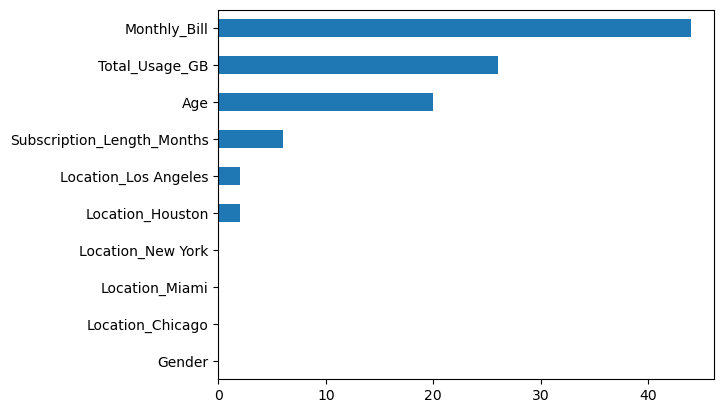

In [160]:
s1 = pd.Series(array * 100, index=x.columns)
s1.sort_values().plot(kind = "barh")
plt.show()

# Results Summary :

In [161]:
results_ada=pd.DataFrame(
{'Model':['Ada Boost Model','rscv ada Model'],
 'Accuracy (Train)':[accurracy_train_ada, accurracy_train_rscv_ada],
 'Accuracy (Test)':[accurracy_test_ada, accurracy_test_rscv_ada],
 'Precision (Test)':[precision_ada, precision_rscv_ada],
 'Recall (Test)':[recall_ada, recall_rscv_ada],
 'F1 Score (Test)':[f1_score_ada, f1_score_rscv_ada],
})
display(results_ada)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Ada Boost Model,0.515493,0.50060,0.499062,0.384054,0.434069
1,rscv ada Model,0.521387,0.50276,0.501610,0.449747,0.474265


# [6] Support Vector Machine Algorithm

###  Spliting the Dataset

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25, random_state=12, stratify=y)

In [163]:
# creating instance & model fitting
svc=SVC()

svc.fit(x_train, y_train)

SVC()

### Model Evaluation

In [164]:
# Evaluation of Training Data
y_pred_train=svc.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[35624  2042]
 [35193  2141]]
************************************************************
Accuracy is --> 0.5035333333333334
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.95      0.66     37666
           1       0.51      0.06      0.10     37334

    accuracy                           0.50     75000
   macro avg       0.51      0.50      0.38     75000
weighted avg       0.51      0.50      0.38     75000



In [165]:
# Evaluation of Testing Data
y_pred = svc.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_svc = precision_score(y_test, y_pred)
recall_svc = recall_score(y_test, y_pred)
f1_score_svc = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[11835   720]
 [11738   707]]
************************************************************
Accuracy is --> 0.50168
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.94      0.66     12555
           1       0.50      0.06      0.10     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.38     25000
weighted avg       0.50      0.50      0.38     25000



## 1) Standardization

###  Spliting the Dataset

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y, test_size=0.25, random_state=12, stratify=y)

In [167]:
# creating instance & model fitting
svc_std=SVC()

svc_std.fit(x_train, y_train)

SVC()

### Model Evaluation

In [168]:
# Evaluation of Training Data
y_pred_train=svc_std.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc_std = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc_std)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[23157 14509]
 [21535 15799]]
************************************************************
Accuracy is --> 0.5194133333333333
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.52      0.61      0.56     37666
           1       0.52      0.42      0.47     37334

    accuracy                           0.52     75000
   macro avg       0.52      0.52      0.51     75000
weighted avg       0.52      0.52      0.51     75000



In [169]:
# Evaluation of Testing Data
y_pred=svc_std.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc_std = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc_std)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_svc_std = precision_score(y_test, y_pred)
recall_svc_std = recall_score(y_test, y_pred)
f1_score_svc_std = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[7458 5097]
 [7341 5104]]
************************************************************
Accuracy is --> 0.50248
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.59      0.55     12555
           1       0.50      0.41      0.45     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



## 2) Normalization

###  Spliting the Dataset

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y, test_size=0.25, random_state=12, stratify=y)

In [171]:
# creating instance & model fitting
svc_norm=SVC()

svc_norm.fit(x_train, y_train)

SVC()

### Model Evaluation

In [172]:
# Evaluation of Training Data
y_pred_train=svc_norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_train_svc_norm = accuracy_score(y_train, y_pred_train)
print("Accuracy is -->", accurracy_train_svc_norm)
print("*"*60)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report -->\n",clf_report)

Confusion Matrix -->
 [[24330 13336]
 [23054 14280]]
************************************************************
Accuracy is --> 0.5148
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.51      0.65      0.57     37666
           1       0.52      0.38      0.44     37334

    accuracy                           0.51     75000
   macro avg       0.52      0.51      0.51     75000
weighted avg       0.52      0.51      0.51     75000



In [173]:
# Evaluation of Testing Data
y_pred=svc_norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accurracy_test_svc_norm = accuracy_score(y_test, y_pred)
print("Accuracy is -->", accurracy_test_svc_norm)
print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("Classification report -->\n",clf_report)

precision_svc_norm = precision_score(y_test, y_pred)
recall_svc_norm = recall_score(y_test, y_pred)
f1_score_svc_norm = f1_score(y_test, y_pred)

Confusion Matrix -->
 [[7930 4625]
 [7814 4631]]
************************************************************
Accuracy is --> 0.50244
************************************************************
Classification report -->
               precision    recall  f1-score   support

           0       0.50      0.63      0.56     12555
           1       0.50      0.37      0.43     12445

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.49     25000
weighted avg       0.50      0.50      0.49     25000



# Results

In [174]:
results_svc=pd.DataFrame(
{'Model':['SVM Model', 'SVM Std', 'SVM Normal'],
 'Accuracy (Train)':[accurracy_train_svc, accurracy_train_svc_std, accurracy_train_svc_norm],
 'Accuracy (Test)':[accurracy_test_svc, accurracy_test_svc_std, accurracy_test_svc_norm],
 'Precision (Test)':[precision_svc, precision_svc_std, precision_svc_norm],
 'Recall (Test)':[recall_svc, recall_svc_std, recall_svc_norm],
 'F1 Score (Test)':[f1_score_svc, f1_score_svc_std, f1_score_svc_norm], 
})
display(results_svc)

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,SVM Model,0.503533,0.50168,0.495445,0.056810,0.101932
1,SVM Std,0.519413,0.50248,0.500343,0.410125,0.450764
2,SVM Normal,0.514800,0.50244,0.500324,0.372117,0.426801


# Comparison of all Results

In [175]:
result=pd.concat([results_log,results_knn,results_dt,results_rf,results_ada, results_svc],axis=0,ignore_index=True)
result['% Diff.']=(result['Accuracy (Train)']-result['Accuracy (Test)'])*100
result

,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),% Diff.
0,Logistic Regression Model,0.504187,0.50440,0.502630,0.422338,0.458999,-0.021333
1,Standardize KNN,0.688013,0.49660,0.494366,0.493532,0.493948,19.141333
2,Normalized KNN,0.687733,0.49716,0.494922,0.493371,0.494145,19.057333
3,GSCV STD KNN,0.687213,0.49992,0.496350,0.311450,0.382739,18.729333
4,GSCV Normal KNN,0.657547,0.49756,0.493149,0.335476,0.399311,15.998667
5,Regular DT Model,1.000000,0.49796,0.496605,0.492821,0.494706,50.204000
6,gscv DT Model,0.507587,0.50268,0.509091,0.076362,0.132803,0.490667
7,Regular RF Model,1.000000,0.49796,0.496459,0.472367,0.484114,50.204000
8,gscv rf Model,0.545147,0.50848,0.511673,0.314671,0.389689,3.666667
9,Ada Boost Model,0.515493,0.50060,0.499062,0.384054,0.434069,1.489333


In [176]:
# From above comparison SVM Std model gives good acuracy with less variance
# Hence, selecting SVM model 

### Storring the feature names, label encoded values in JSON file

In [186]:
feature_names = x.columns
Gender_value={'Female': 0, 'Male': 1}

json_data = {"Gender":Gender_value, 
             "columns":list(feature_names),
            }

with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

### Storring all fitted model in pickle file

In [189]:
# all fitted model are storring for reference.
with open("models/log_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

with open("models/knn_std.pkl", "wb") as f:
    pickle.dump(knn_std, f)
    
with open("models/gscv_knn_std.pkl", "wb") as f:
    pickle.dump(gscv_knn_std, f)

with open("models/knn_norm.pkl", "wb") as f:
    pickle.dump(knn_norm, f)
    
with open("models/gscv_knn_norm.pkl", "wb") as f:
    pickle.dump(gscv_knn_norm, f)
    
with open("models/dt_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)
    
with open("models/gscv_dt.pkl", "wb") as f:
    pickle.dump(gscv_dt, f)
    
with open("models/rf.pkl", "wb") as f:
    pickle.dump(rf, f)
    
with open("models/rscv_rf.pkl", "wb") as f:
    pickle.dump(rscv_rf, f)
    
with open("models/ada.pkl", "wb") as f:
    pickle.dump(ada, f)
    
with open("models/rscv_ada.pkl", "wb") as f:
    pickle.dump(rscv_ada, f)
    
with open("models/svc.pkl", "wb") as f:
    pickle.dump(svc, f)
    
with open("models/svc_std.pkl", "wb") as f:
    pickle.dump(svc_std, f)
    
with open("models/svc_norm.pkl", "wb") as f:
    pickle.dump(svc_norm, f)
    
    
#fitted related Standardize scalling term
with open("models/StandardScaler.pkl", "wb") as f:
    pickle.dump(std_scaler, f)

#fitted related Normalize scalling term
with open("models/MinMaxScaler.pkl", "wb") as f:
    pickle.dump(norm_scaler, f)

### loading models

In [190]:
with open("Project_data.json", "r") as f:
    json_data=json.load(f)

#fitted model
with open("models/svc_std.pkl", "rb") as f:
    model=pickle.load(f)

# Prediction on User entered value for testing

In [191]:
Age                         = 36
Gender                      = "Female"
Location                    = "Miami"
Subscription_Length_Months  = 3
Monthly_Bill                = 97.94
Total_Usage_GB              = 297

# Feature"CustomerID" and "Name" have no contribution on prediction

### conversion for One-Hot Encoded values

In [192]:
Location = "Location_" + Location
# index of one-hot encodded columns
Location_index = json_data['columns'].index(Location)

### conversion for label Encoded values

In [193]:
Gender=json_data['Gender'][Gender]

### Creating array of user input values

In [194]:
test_array = np.zeros(len(json_data['columns']))

# Note: put feature values in front of correct feature index according to training dataset
test_array[0] = Age
test_array[1] = Gender    #label encodded
test_array[2] = Subscription_Length_Months
test_array[3] = Monthly_Bill
test_array[4] = Total_Usage_GB
test_array[Location_index] = 1   # one-hot encodded

test_array

array([ 36.  ,   0.  ,   3.  ,  97.94, 297.  ,   0.  ,   0.  ,   0.  ,
         1.  ,   0.  ])

## Manual Prediction Output Testing

In [196]:
prediction = model.predict([test_array])[0]

if prediction==1:
    print("Customer would be Churn")
else:
    print("Customer would not be Churn")

Customer would be Churn


## Model Deployment

In [ ]:
# Model is ready to deploy in main.py file to test using Flask web framework using HTML file rendering to get input from user. 
# Also provision of testing using postman is also provided in main.py file, Kindly Go through that.